In [2]:
from fastai.vision import *

In [6]:
file = 'urls_korean.txt'
folder = 'korean'

In [8]:
file = 'urls_american.txt'
folder = 'american'

In [7]:
path = Path('/home/ubuntu/data/actress')


In [5]:
path = Path('/home/ubuntu/data/actress')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

NameError: name 'folder' is not defined

In [5]:
path.ls()

[PosixPath('/home/ubuntu/data/actress/urls_korean.txt'),
 PosixPath('/home/ubuntu/data/actress/urls_american.txt'),
 PosixPath('/home/ubuntu/data/actress/american'),
 PosixPath('/home/ubuntu/data/actress/urls_japanese.txt'),
 PosixPath('/home/ubuntu/data/actress/urls_chinese.txt'),
 PosixPath('/home/ubuntu/data/actress/korean')]

In [9]:
download_images(path/file, dest, max_pics=1000)

NameError: name 'dest' is not defined

In [10]:
classes = ['korean', 'american']

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete = True)

In [24]:
print(path/folder)
verify_images(path/folder, delete = True)

In [11]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct = 0.2, 
                           ds_tfms = get_transforms(), size=224,
                           num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['american', 'korean']

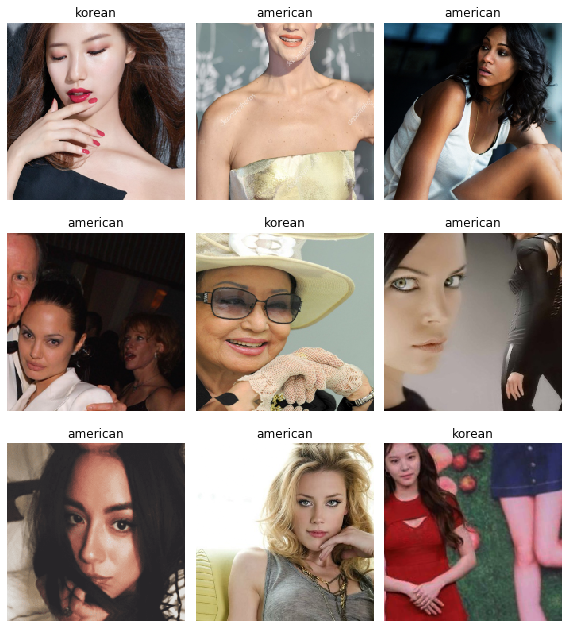

In [13]:
data.show_batch(rows = 3, figsize=(8,9))

In [14]:
learn = create_cnn(data, models.resnet50, metrics = error_rate)

/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.752098,0.436505,0.171429,00:39
1,0.614159,0.463469,0.212245,00:32
2,0.489411,0.408392,0.167347,00:33
3,0.413446,0.395903,0.183673,00:31


In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


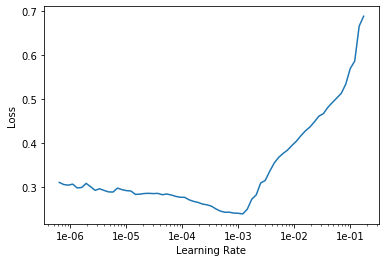

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.261110,0.477039,0.175510,00:33
1,0.236766,0.296415,0.122449,00:32
2,0.184948,0.287214,0.114286,00:35


In [21]:
learn.save('stage-2')

In [22]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (980 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american,american,american,american,american
Path: /home/ubuntu/data/actress;

Valid: LabelList (245 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
korean,korean,american,korean,american
Path: /home/ubuntu/data/actress;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, moment

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

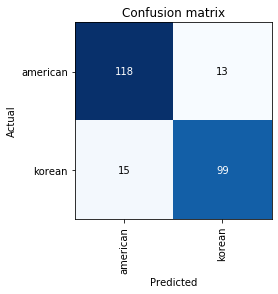

In [25]:
interp.plot_confusion_matrix()

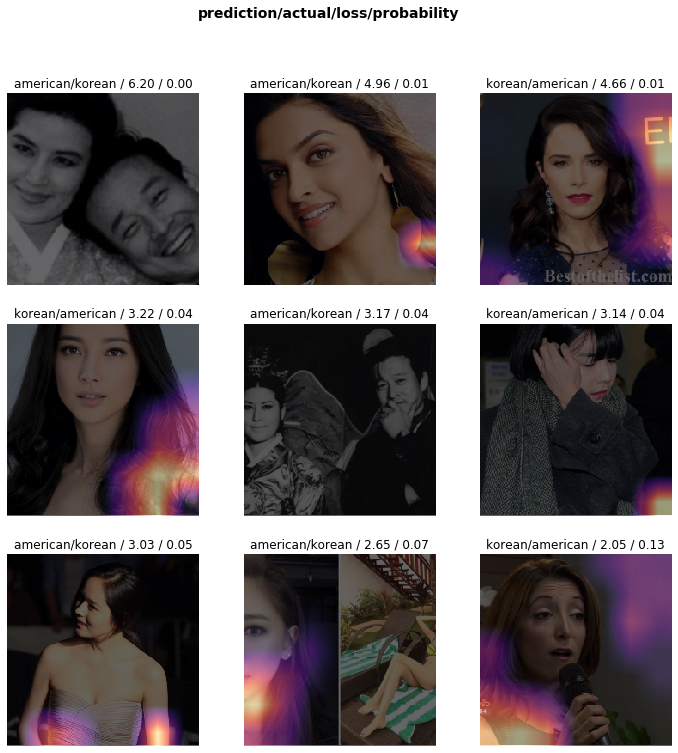

In [26]:
interp.plot_top_losses(9)

In [28]:
from fastai.widgets import *

In [31]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch())

In [32]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

In [33]:
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1225 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american,american,american,american,american
Path: /home/ubuntu/data/actress;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/ubuntu/data/actress;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [34]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [36]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct = 0.2, 
                           ds_tfms = get_transforms(), size=224,
                           num_workers=4).normalize(imagenet_stats)

In [ ]:
data2 = ImageDataBunch.from_csv(path, valid_pct=0.2, ds_tfms = get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data3 = ImageDataBunch.from_csv(path, size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data4 = ImageDataBunch.from_csv(path).normalize(imagenet_stats)

In [39]:
print(data2)

ImageDataBunch;

Train: LabelList (938 items)
x: ImageList
Image (3, 525, 700),Image (3, 600, 800),Image (3, 455, 728),Image (3, 675, 1200),Image (3, 486, 304)
y: CategoryList
american,american,american,american,american
Path: /home/ubuntu/data/actress;

Valid: LabelList (234 items)
x: ImageList
Image (3, 767, 1150),Image (3, 1024, 682),Image (3, 887, 590),Image (3, 806, 602),Image (3, 200, 350)
y: CategoryList
american,korean,american,korean,american
Path: /home/ubuntu/data/actress;

Test: None


In [40]:
learn2 = cnn_learner(data2, models.resnet50, metrics = error_rate)

In [42]:
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/torch_core.py", line 127, in data_collate
    return torch.utils.data.dataloader.default_collate(to_data(batch))
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 68, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 68, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 43, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 2400 and 750 in dimension 2 at /opt/conda/conda-bld/pytorch_1556653114079/work/aten/src/TH/generic/THTensor.cpp:711
